In [36]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

import random

random.seed(42)
np.random.seed(42)

In [2]:
# load the data

df = pd.read_csv("../Data/Portfolio.csv")
df.head()

,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,2.945385,18.709999,0,3.295837
1,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,2.945385,18.709999,0,2.995732
2,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,2.945385,18.709999,0,3.295837
3,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,2.945385,18.709999,1,3.178054
4,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,2.945385,18.709999,0,2.772589


In [3]:
df['default'].value_counts()

default
0    659
1     17
Name: count, dtype: int64

In [4]:
# load the model

model = joblib.load('../Models/LogisticRegression.pkl')
model

(CVXPY) Jun 24 04:21:52 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jun 24 04:21:52 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'total_acc', 'pct_tl_nvr_dlq', 'GDP', 'VIX',
       'years_since_first_cr_line'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   BinningProcess(variable_names=['term',
                                                                                                  'grade',
                                                                                                  'home_ownership',
                                                                                                  'purpose',
                                                                                                  'pub_rec_bankruptcies']))]),
                                                  Index(['term', 'grade', 'home_ownership', 'purpose', 'pub_rec_bankruptcies'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', LogisticRegression())])

In [5]:
# load macroeconomic variables

macro = pd.read_csv("../Data/Macro.csv")
macro.head()

,GDP,Date,VIX
0,NaN,2006-12-01,NaN
1,2.782811,2007-01-01,11.56
2,2.782811,2007-02-01,10.42
3,2.782811,2007-03-01,15.42
4,2.782811,2007-04-01,14.64


Gnerate new observations of the the loans issued in September 2020 by replacing the GDP growth rate and the VIX with new values coming from macroeconomic data.

In [6]:
macro_subset = macro.loc[(macro['Date'] >= '2019-06-01') & (macro['Date'] <= '2020-12-01')]

macro_subset.shape

(19, 3)

In [7]:
macro_subset

,GDP,Date,VIX
150,2.945385,2019-06-01,18.709999
151,2.945385,2019-07-01,15.080000
152,2.945385,2019-08-01,16.120001
153,2.945385,2019-09-01,18.980000
154,2.945385,2019-10-01,16.240000
155,2.945385,2019-11-01,13.220000
156,2.945385,2019-12-01,12.620000
157,2.294439,2020-01-01,13.780000
158,2.294439,2020-02-01,18.840000
159,2.294439,2020-03-01,40.110001


In [8]:
# give identifier to the loans in the portfolio

df['ID'] = range(1, len(df) + 1)
# move it to the first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,2.945385,18.709999,0,3.295837
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,2.945385,18.709999,0,2.995732
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,2.945385,18.709999,0,3.295837
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,2.945385,18.709999,1,3.178054
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,2.945385,18.709999,0,2.772589


In [9]:
# Expand the portfolio dataframe
expanded_portfolio_df = df.loc[df.index.repeat(len(macro_subset))]
expanded_portfolio_df = expanded_portfolio_df.reset_index(drop=True)

expanded_portfolio_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line
0,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
1,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
2,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
3,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
4,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
12840,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
12841,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759
12842,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759


In [10]:
# Add a date column to match the macroeconomic data
expanded_portfolio_df['Date'] = list(macro_subset['Date']) * len(df)
expanded_portfolio_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,GDP,VIX,default,years_since_first_cr_line,Date
0,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-06-01
1,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-07-01
2,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-08-01
3,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-09-01
4,1,2019-06-01,10.596660,36 months,0.124,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.0,0,2.945385,18.709999,0,3.295837,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2020-08-01
12840,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2020-09-01
12841,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2020-10-01
12842,676,2019-06-01,9.903538,36 months,0.143,6.533033,C,RENT,11.775297,other,2.091864,2.197225,1.0,0,2.945385,18.709999,0,1.791759,2020-11-01


In [11]:
# drop GDP and VIX from portfolio
expanded_portfolio_df = expanded_portfolio_df.drop(columns=['GDP', 'VIX'])

In [12]:
# Merge the dataframes
merged_df = pd.merge(expanded_portfolio_df, macro_subset, on='Date')
merged_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,0,2.995732,2019-06-01,2.945385,18.709999
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,1,3.178054,2019-06-01,2.945385,18.709999
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,0,2.772589,2019-06-01,2.945385,18.709999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,672,2019-06-01,9.903538,60 months,0.1240,6.109136,B,RENT,10.821557,moving,3.407842,3.258097,1.000,0,0,2.772589,2020-12-01,2.294439,20.570000
12840,673,2019-06-01,9.952325,60 months,0.1430,6.200327,C,RENT,10.434145,debt_consolidation,2.551006,1.791759,1.000,0,0,3.332205,2020-12-01,2.294439,20.570000
12841,674,2019-06-01,10.308986,60 months,0.1033,6.466611,B,MORTGAGE,10.596660,debt_consolidation,2.874694,3.295837,0.962,0,0,3.218876,2020-12-01,2.294439,20.570000
12842,675,2019-06-01,8.699681,36 months,0.1430,5.332477,C,MORTGAGE,11.652696,car,2.705380,2.302585,0.778,0,0,2.944439,2020-12-01,2.294439,20.570000


In [13]:
# PD predictions for the portfolio

X = merged_df.drop(columns=['ID', 'default', 'Date', 'issue_d'])
y_pred = model.predict_proba(X)[:, 1]

# Add the PD predictions to the dataframe
merged_df['PD'] = y_pred
merged_df

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX,PD
0,1,2019-06-01,10.596660,36 months,0.1240,7.198356,B,MORTGAGE,11.518917,debt_consolidation,3.040228,3.401197,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999,0.423227
1,2,2019-06-01,9.392745,36 months,0.1774,6.071361,C,MORTGAGE,11.156265,medical,3.545298,3.465736,1.000,0,0,2.995732,2019-06-01,2.945385,18.709999,0.536190
2,3,2019-06-01,7.661998,36 months,0.1171,4.266756,B,RENT,10.126671,debt_consolidation,3.538347,2.772589,1.000,0,0,3.295837,2019-06-01,2.945385,18.709999,0.430489
3,4,2019-06-01,9.210440,36 months,0.2500,5.987958,D,OWN,11.082158,debt_consolidation,3.441699,3.465736,0.968,0,1,3.178054,2019-06-01,2.945385,18.709999,0.645162
4,5,2019-06-01,9.210440,36 months,0.0881,5.762429,A,RENT,11.205054,credit_card,2.764431,2.890372,1.000,0,0,2.772589,2019-06-01,2.945385,18.709999,0.278538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,672,2019-06-01,9.903538,60 months,0.1240,6.109136,B,RENT,10.821557,moving,3.407842,3.258097,1.000,0,0,2.772589,2020-12-01,2.294439,20.570000,0.547816
12840,673,2019-06-01,9.952325,60 months,0.1430,6.200327,C,RENT,10.434145,debt_consolidation,2.551006,1.791759,1.000,0,0,3.332205,2020-12-01,2.294439,20.570000,0.589222
12841,674,2019-06-01,10.308986,60 months,0.1033,6.466611,B,MORTGAGE,10.596660,debt_consolidation,2.874694,3.295837,0.962,0,0,3.218876,2020-12-01,2.294439,20.570000,0.449987
12842,675,2019-06-01,8.699681,36 months,0.1430,5.332477,C,MORTGAGE,11.652696,car,2.705380,2.302585,0.778,0,0,2.944439,2020-12-01,2.294439,20.570000,0.383429


Based on PD predictions and the investor's risk tolerance, the portfolio is iteratively rebalanced period by period. 
Let's make an example for the first month. In the first month, the algorithm can only buy the loans available in the secondary market, as the portfolio still needs to constructed.

In [14]:
# use case with one randomlly selected loan
loan_id = np.random.choice(df['ID'])
loan_data = merged_df.loc[merged_df['ID'] == loan_id]
loan_data

,ID,issue_d,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,purpose,dti,total_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,default,years_since_first_cr_line,Date,GDP,VIX,PD
102,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-06-01,2.945385,18.709999,0.318799
778,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-07-01,2.945385,15.080000,0.311206
1454,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-08-01,2.945385,16.120001,0.313372
2130,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-09-01,2.945385,18.980000,0.319368
2806,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-10-01,2.945385,16.240000,0.313622
3482,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-11-01,2.945385,13.220000,0.307354
4158,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2019-12-01,2.945385,12.620000,0.306117
4834,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-01-01,2.294439,13.780000,0.290669
5510,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-02-01,2.294439,18.840000,0.300886
6186,103,2019-06-01,9.928229,36 months,0.1033,6.500779,B,MORTGAGE,12.345839,car,2.745346,3.367296,0.893,0,0,3.135494,2020-03-01,2.294439,40.110001,0.345951


In [33]:
def risk_profile():
    risk_level = input("Enter your risk tolerance (low, medium, high): ").strip().lower()
    if risk_level in ["low", "medium", "high"]:
        return risk_level
    else:
        print("Invalid input. Defaulting to medium risk.")
        return "medium"


def get_pd_threshold(risk_tolerance):
    if risk_tolerance == "low":
        return (0.0, 0.3)  # PD in range [0, 0.3]
    elif risk_tolerance == "medium":
        return (0.3, 0.6)  # PD in range (0.3, 0.6]
    elif risk_tolerance == "high":
        return (0.6, 1.0)  # PD in range (0.6, 1.0]
    else:
        return (0.3, 0.6)  # Default to medium risk tolerance

risk_tolerance = risk_profile()
pd_threshold = get_pd_threshold(risk_tolerance)

loans_bought = []
for index, row in loan_data.iterrows():
    loan_id = row['ID']
    pd_value = row['PD']
    date = row['Date']

    if loan_id not in loans_bought:  # If the loan is not in the portfolio
        if pd_threshold[0] < pd_value <= pd_threshold[1]:
            loans_bought.append(loan_id)
            print(f"Date: {date} - Buy loan {loan_id}")
        else:
            print(f"Date: {date} - Do not buy loan {loan_id}")
    else:  # If the loan is already in the portfolio
        if pd_threshold[0] < pd_value <= pd_threshold[1]:
            print(f"Date: {date} - Hold loan {loan_id}")
        else:
            loans_bought.remove(loan_id)
            print(f"Date: {date} - Sell loan {loan_id}")

print(f"Final loans bought: {loans_bought}")

Date: 2019-06-01 - Buy loan 103
Date: 2019-07-01 - Hold loan 103
Date: 2019-08-01 - Hold loan 103
Date: 2019-09-01 - Hold loan 103
Date: 2019-10-01 - Hold loan 103
Date: 2019-11-01 - Hold loan 103
Date: 2019-12-01 - Hold loan 103
Date: 2020-01-01 - Sell loan 103
Date: 2020-02-01 - Buy loan 103
Date: 2020-03-01 - Hold loan 103
Date: 2020-04-01 - Hold loan 103
Date: 2020-05-01 - Hold loan 103
Date: 2020-06-01 - Hold loan 103
Date: 2020-07-01 - Hold loan 103
Date: 2020-08-01 - Hold loan 103
Date: 2020-09-01 - Hold loan 103
Date: 2020-10-01 - Hold loan 103
Date: 2020-11-01 - Hold loan 103
Date: 2020-12-01 - Hold loan 103
Final loans bought: [103]


In [ ]:
# expected return of the single use case loan


In [ ]:
# case for all loans available in the secondary market (merged_df)
risk_tolerance = risk_profile()
pd_threshold = get_pd_threshold(risk_tolerance)
results = {
    'Date': [],
    'Loans Bought': [],
    'Loans Held': [],
    'Loans Sold': [],
    'Transaction Volume': []
}
portfolio = []
for date in merged_df['Date'].unique():
    loans_data = merged_df.loc[merged_df['Date'] == date]
    loans_bought = []
    loans_held = []
    loans_sold = []
    transactions = 0
    for index, row in loans_data.iterrows():
        loan_id = row['ID']
        pd_value = row['PD']

        if loan_id not in portfolio:  # If the loan is not in the portfolio
            if pd_threshold[0] < pd_value <= pd_threshold[1]:
                loans_bought.append(loan_id)
                portfolio.append(loan_id)
                transactions += 1
            else:
                continue
        else:  # If the loan is already in the portfolio
            if pd_threshold[0] < pd_value <= pd_threshold[1]:
                loans_held.append(loan_id)
            else:
                portfolio.remove(loan_id)
                loans_sold.append(loan_id)
                transactions += 1

    results['Date'].append(date)
    results['Loans Bought'].append(len(loans_bought))
    results['Loans Held'].append(len(loans_held))
    results['Loans Sold'].append(len(loans_sold))
    results['Transaction Volume'].append(transactions)

results_df = pd.DataFrame(results)

In [41]:
# show only year and month in date to improve readability
results_df['Date'] = results_df['Date'].str.slice(0, 7)
results_df['Date']

0     2019-06
1     2019-07
2     2019-08
3     2019-09
4     2019-10
5     2019-11
6     2019-12
7     2020-01
8     2020-02
9     2020-03
10    2020-04
11    2020-05
12    2020-06
13    2020-07
14    2020-08
15    2020-09
16    2020-10
17    2020-11
18    2020-12
Name: Date, dtype: object

C:\Users\Utente\AppData\Local\Temp\ipykernel_1208\1888741831.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(results_df['Date'], rotation=45)


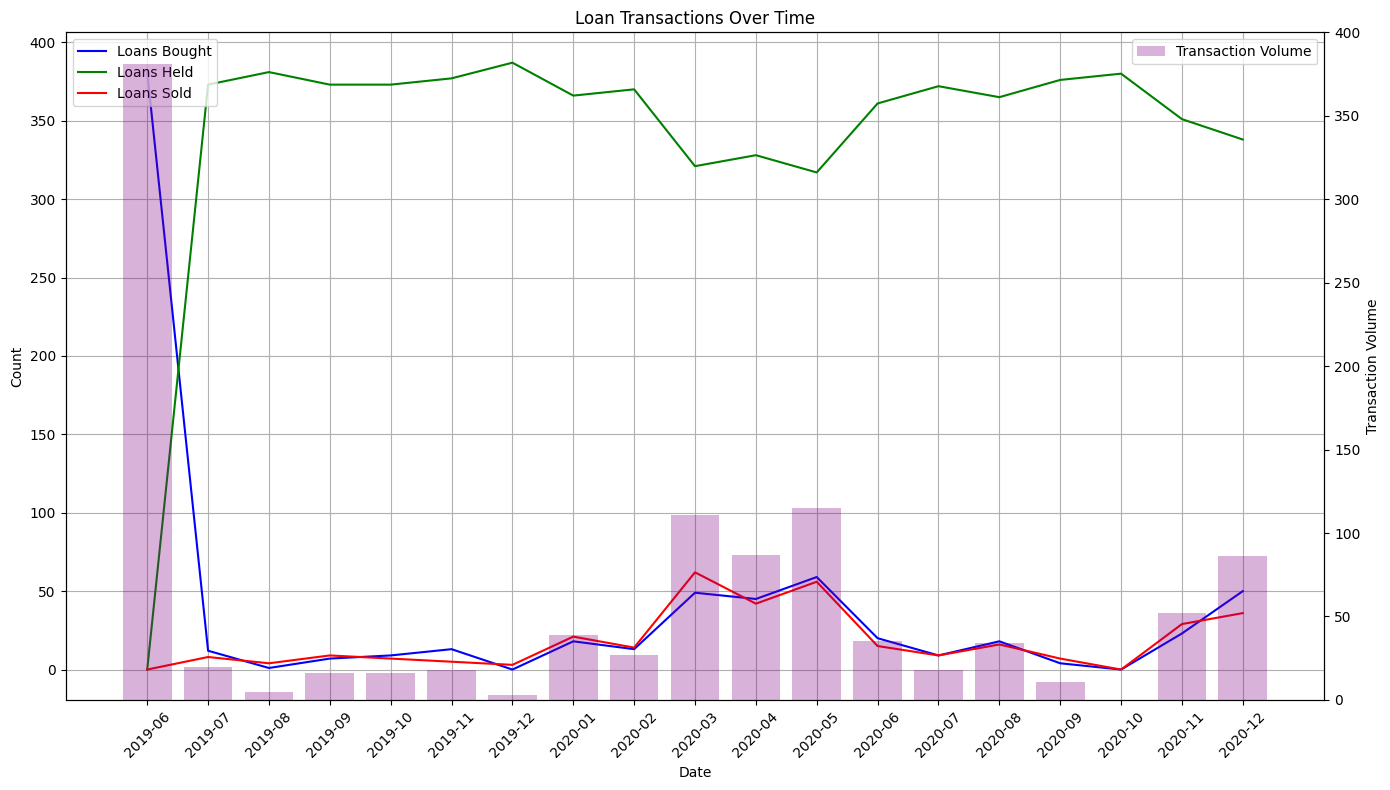

In [48]:
fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(results_df['Date'], results_df['Loans Bought'], label='Loans Bought', color='blue')
ax1.plot(results_df['Date'], results_df['Loans Held'], label='Loans Held', color='green')
ax1.plot(results_df['Date'], results_df['Loans Sold'], label='Loans Sold', color='red')
ax1.set_xlabel('Date')
ax1.set_xticklabels(results_df['Date'], rotation=45)
ax1.set_ylabel('Count')
ax1.set_title('Loan Transactions Over Time')
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.bar(results_df['Date'], results_df['Transaction Volume'], label='Transaction Volume', color='purple', alpha=0.3)
ax2.set_ylabel('Transaction Volume')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [ ]:
# expected return for the portfolio
